In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install


Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 28 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.68 MiB | 26.72 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 11.5 MB/s eta 0:00:00


In [2]:
import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-388-g882c35fc Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.7/112.6 GB disk)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!python train.py --img 416 --batch 16 --epochs 10 --data coco128.yaml --weights yolov5s.pt --cache

2024-11-28 09:58:16.841712: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-28 09:58:16.877774: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-28 09:58:16.888652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, opt

In [5]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.25 --source /content/drive/MyDrive/val2017/

Streaming output truncated to the last 5000 lines.
image 12/5009 /content/drive/MyDrive/val2017/000000001296.jpg: 416x288 4 persons, 1 cell phone, 12.8ms
image 13/5009 /content/drive/MyDrive/val2017/000000001353.jpg: 416x320 5 persons, 1 suitcase, 1 chair, 7.4ms
image 14/5009 /content/drive/MyDrive/val2017/000000001425.jpg: 352x416 1 cup, 2 sandwichs, 1 dining table, 32.2ms
image 15/5009 /content/drive/MyDrive/val2017/000000001490.jpg: 224x416 1 person, 29.2ms
image 16/5009 /content/drive/MyDrive/val2017/000000001503.jpg: 320x416 1 tv, 1 laptop, 2 mouses, 3 keyboards, 11.4ms
image 17/5009 /content/drive/MyDrive/val2017/000000001532.jpg: 320x416 6 cars, 2 trucks, 8.5ms
image 18/5009 /content/drive/MyDrive/val2017/000000001584.jpg: 416x416 7 persons, 3 buss, 7.5ms
image 19/5009 /content/drive/MyDrive/val2017/000000001675.jpg: 320x416 1 cat, 1 laptop, 7.1ms
image 20/5009 /content/drive/MyDrive/val2017/000000001761.jpg: 416x288 2 airplanes, 1 bird, 7.2ms
image 21/5009 /content/drive/MyDriv

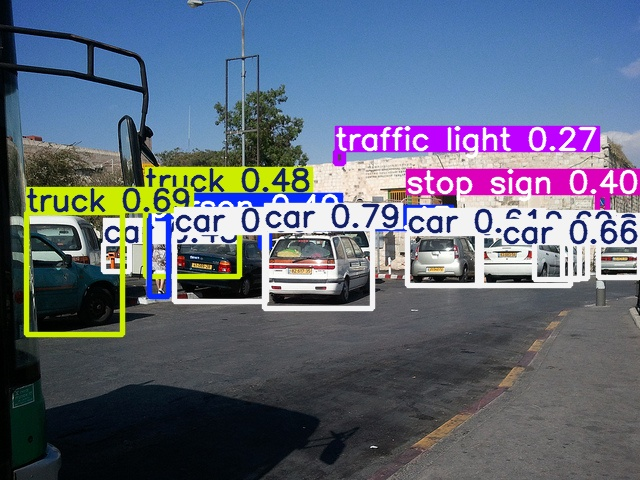

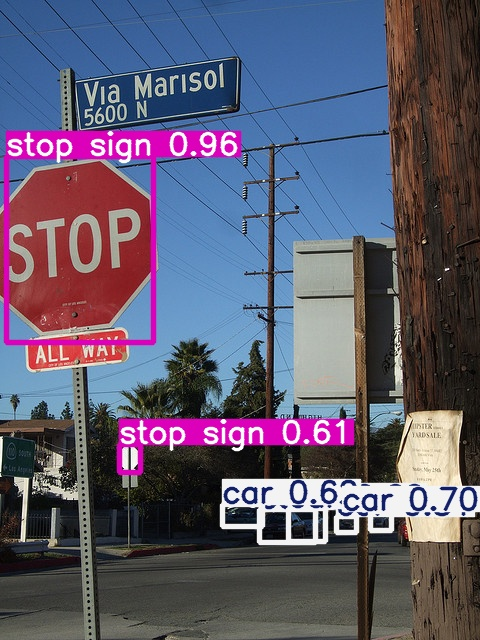

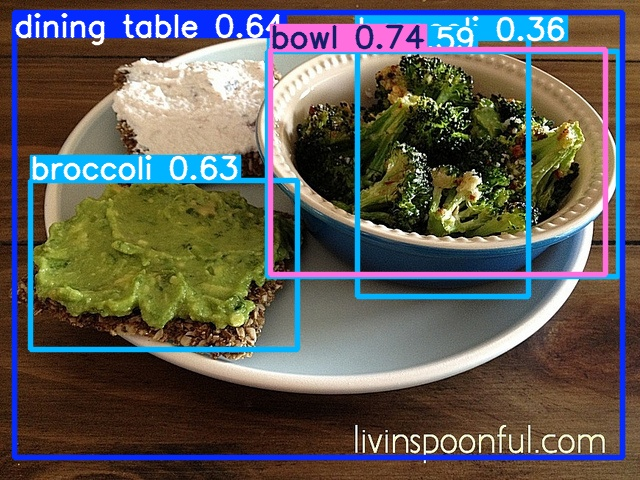

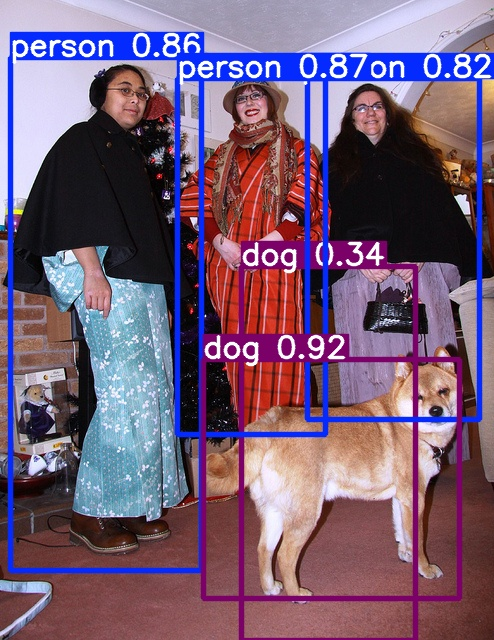

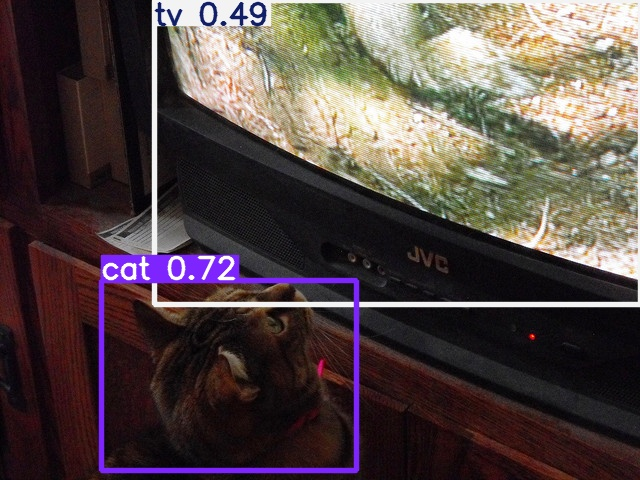

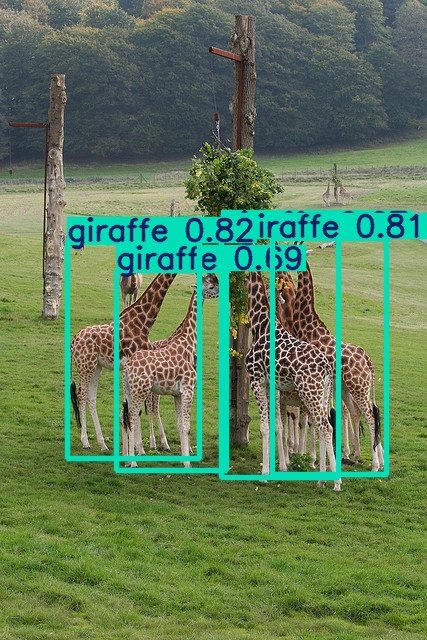

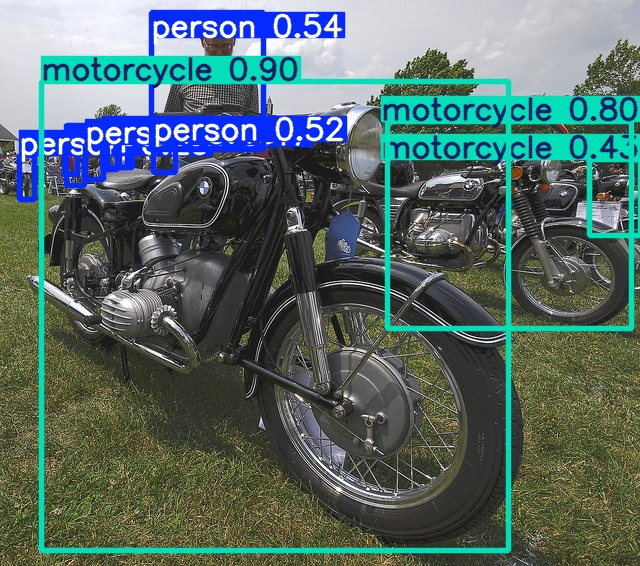

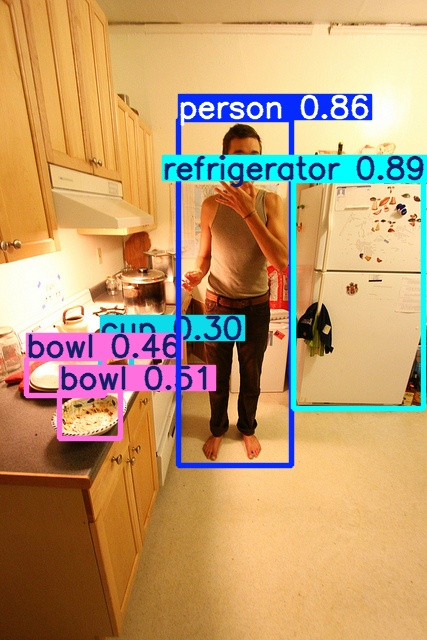

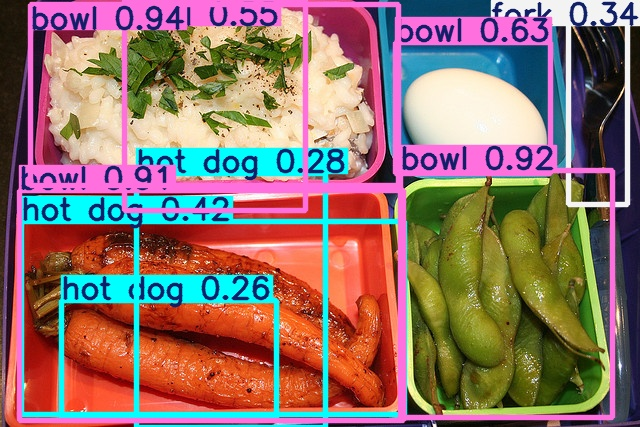

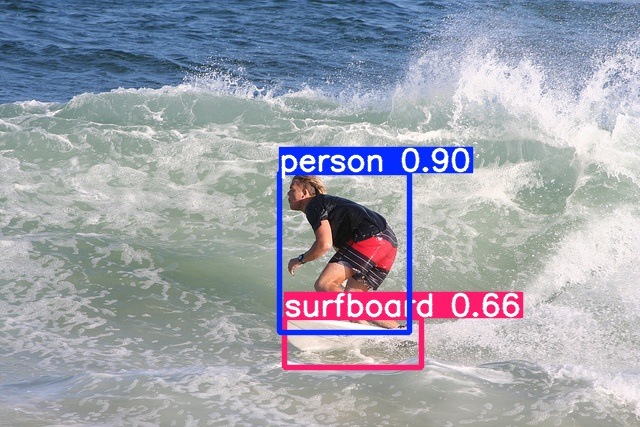

In [7]:
import cv2
import os
from google.colab.patches import cv2_imshow

# Assuming 'results' is a list of detected images returned by the model
results_dir = 'runs/detect/exp'
image_count = 0
for img_name in os.listdir(results_dir):
    if img_name.endswith('.jpg') or img_name.endswith('.png'):
        img_path = os.path.join(results_dir, img_name)
        img = cv2.imread(img_path)
        cv2_imshow(img)
        image_count += 1
        if image_count >= 10:
            break